Frederico Furst Bittencourt

2022/09/14

Copied and modified from https://scipy-cookbook.readthedocs.io/items/CoupledSpringMassSystem.html (em 2002/jun/07).

Tentative titles:

- The prediction of Strength, Damage Initiation and Damage Progression in the Open Hole, Filled Hole and Single-Shear Bearing tests for Composite Material Laminates and Chaos and Hyperchaos in the Triple Mass-Spring System Dynamic Response

- Chaos and Hyperchaos in the Triple Mass-Spring Dynamic Response and its application to the prediction of Strength, Damage Initiation and Damage Progression in the Open Hole, Filled Hole and Single-Shear Bearing tests for Composite Material Laminates

# Four Mass-Spring Model

## Imports and Libraries

In [ ]:
!pip install nolds
import nolds
import numpy as np
# Plot the solution that was generated
import matplotlib.pyplot as plt
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Model Specification

In [ ]:
forca_inicial = 0.0
forca_final = -1.0
tempo_inicial = 5.0
tempo_final = 10.0

In [ ]:
n=8

In [ ]:
# Parameter values
# Masses:
# m1 = 2.0
m = 2.0/n
# Spring constants
# k1 = 5.0
k = 0.03*n
# Natural lengths
# L1 = 1.0
L = 4.0/n
# Friction coefficients
# b1 = 0.6
b = 0.2

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 1.0*L
y1 = 0.0
x2 = 2.0*L
y2 = 0.0
x3 = 3.0*L
y3 = 0.0
x4 = 4.0*L
y4 = 0.0
x5 = 5.0*L
y5 = 0.0
x6 = 6.0*L
y6 = 0.0
x7 = 7.0*L
y7 = 0.0
x8 = 8.0*L
y8 = 0.0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 25.0
numpoints = 1000

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

## Entrada de Degrau de Força em $x_3$

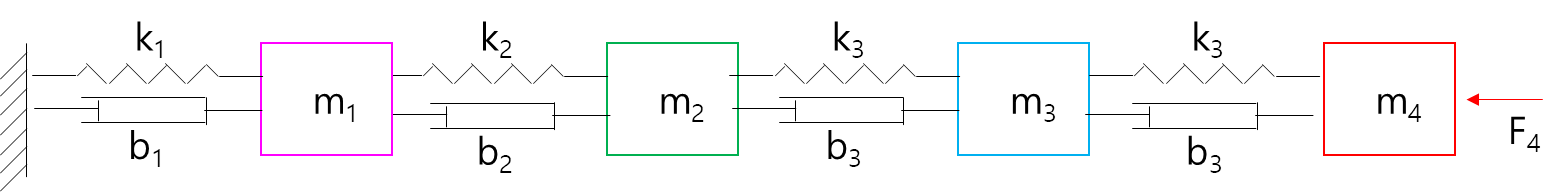

### Entradas

#### Degrau de Força de Entrada

In [ ]:
# degrau de forca
def degrau_forca(t):
    if t <= 5.0:
        forca = forca_inicial
    else:
        forca = forca_final
    return forca

#### Campo Vetorial

In [ ]:
def degrau_forca_vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2,x3,y3]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,m3,k1,k2,k3,L1,L2,L3,b1,b2,b3]
    """
    x1, y1, x2, y2, x3, y3, x4, y4, x5, y5, x6, y6, x7, y7, x8, y8 = w
    m, k, L, b = p

    # Create f = (x1',y1',x2',y2' ...):
    f = [
            y1,
            (-b * y1 - k * (x1 - L) + k * (x2 - x1 - L) ) / m,
            y2,
            (-b * y2 - k * (x2 - x1 - L) + k * (x3 - x2 - L) ) / m,
            y3,
            (-b * y3 - k * (x3 - x2 - L) + k * (x4 - x3 - L) ) / m,
            y4,
            (-b * y4 - k * (x4 - x3 - L) + k * (x5 - x4 - L) ) / m,
            y5,
            (-b * y5 - k * (x5 - x4 - L) + k * (x6 - x5 - L) ) / m,
            y6,
            (-b * y6 - k * (x6 - x5 - L) + k * (x7 - x6 - L) ) / m,
            y7,
            (-b * y7 - k * (x7 - x6 - L) + k * (x8 - x7 - L) ) / m,
            y8,
            (-b * y8 - k * (x8 - x7 - L) + degrau_forca(t)) / m,
         ]
    return f

### Saídas

#### Unpacking

In [ ]:
p = [m, k, L, b]
w0 = [x1, y1, x2, y2, x3, y3, x4, y4, x5, y5, x6, y6, x7, y7, x8, y8]

# Call the ODE solver.
wsol = odeint(degrau_forca_vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

at, ax1, ay1, ax2, ay2, ax3, ay3, ax4, ay4  = [],[],[],[],[],[],[],[],[],
ax5, ay5, ax6, ay6, ax7, ay7, ax8, ay8  = [],[],[],[],[],[],[],[],
# adendo
IE1, KE1 = [],[]
IE2, KE2 = [],[]
IE3, KE3 = [],[]
IE4, KE4 = [],[]
IE5, KE5 = [],[]
IE6, KE6 = [],[]
IE7, KE7 = [],[]
IE8, KE8 = [],[]
ET = []
for t1, w1 in zip(t, wsol):
    # print( t1, w1[0], w1[1], w1[2], w1[3])
    at.append(t1)
    ax1.append(w1[0])
    ay1.append(w1[1])
    ax2.append(w1[2])
    ay2.append(w1[3])
    ax3.append(w1[4])
    ay3.append(w1[5])
    ax4.append(w1[6])
    ay4.append(w1[7])
    ax5.append(w1[8])
    ay5.append(w1[9])
    ax6.append(w1[10])
    ay6.append(w1[11])
    ax7.append(w1[12])
    ay7.append(w1[13])
    ax8.append(w1[14])
    ay8.append(w1[15])

    IE1.append(k*(w1[0]-L)**2/2)
    KE1.append(m*w1[1]**2/2)
    IE2.append(k*(w1[2]-w1[0]-L)**2/2)
    KE2.append(m*w1[3]**2/2)
    IE3.append(k*(w1[4]-w1[2]-L)**2/2)
    KE3.append(m*w1[5]**2/2)
    IE4.append(k*(w1[6]-w1[4]-L)**2/2)
    KE4.append(m*w1[7]**2/2)
    ET.append(k*(w1[0]-L)**2/2+
              m*w1[1]**2/2+
              k*(w1[2]-w1[0]-L)**2/2+
              m*w1[3]**2/2+
              k*(w1[4]-w1[2]-L)**2/2+
              m*w1[5]**2/2+
              k*(w1[6]-w1[4]-L)**2/2+
              m*w1[7]**2/2)

#### Forças Aplicada e de Reação

IndexError: ignored

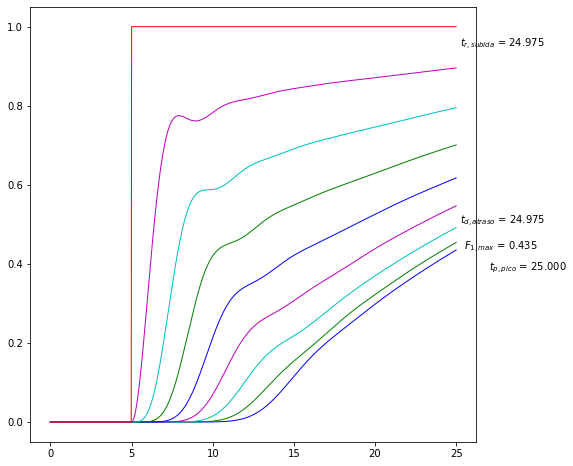

In [ ]:
plt.figure(figsize=(8,8))
F1 = -k*np.array(ax1) + np.array([k*L for i in range(len(ax1))])
plt.plot(at, F1, 'b', linewidth=1)
F2 = -k*(np.array(ax2)-np.array(ax1)-L)
plt.plot(at, F2, 'g', linewidth=1)
F3 = -k*(np.array(ax3)-np.array(ax2)-L)
plt.plot(at, F3, 'c', linewidth=1)
F4 = -k*(np.array(ax4)-np.array(ax3)-L)
plt.plot(at, F4, 'm', linewidth=1)
F5 = -k*(np.array(ax5)-np.array(ax4)-L)
plt.plot(at, F5, 'b', linewidth=1)
F6 = -k*(np.array(ax6)-np.array(ax5)-L)
plt.plot(at, F6, 'g', linewidth=1)
F7 = -k*(np.array(ax7)-np.array(ax6)-L)
plt.plot(at, F7, 'c', linewidth=1)
F8 = -k*(np.array(ax8)-np.array(ax7)-L)
plt.plot(at, F8, 'm', linewidth=1)
plt.plot(at, -np.array([ degrau_forca(t) for t in at ]), 'r', linewidth=1)

plt.text(
    at[np.where(F1 == max(F1))[0][0]]+0.5,
    max(F1),
    '$F_{1,max}$ = '+str("{:.3f}".format(max(F1)))
    )
array_diferencas = F1 - (-forca_final)
indice_tr = np.abs(array_diferencas)[:np.where(F1 == max(F1))[0][0]].argmin()
plt.text(
    at[indice_tr]+0.25,
    -forca_final-0.05,
    '$t_{r,subida}$ = '+str("{:.3f}".format(at[indice_tr]))
    )
array_diferencas = F1 - (-forca_final/2)
indice_td = np.abs(array_diferencas)[:np.where(F1 == max(F1))[0][0]].argmin()
plt.text(
    at[indice_td]+0.25,
    - forca_final/2,
    '$t_{d,atraso}$ = '+str("{:.3f}".format(at[indice_td]))
    )
indice_tp = np.where(F1 == max(F1))[0][0]
plt.text(
    at[indice_tp]+2,
    F1[indice_tp]-0.05,
    '$t_{p,pico}$ = '+str("{:.3f}".format(at[indice_tp]))
    )
tolerancia = 0.02
array_diferencas_abs = np.abs( F1 - (-forca_final) )
indices_tol = np.where(array_diferencas_abs < tolerancia)[0]
comecos_de_pedacos = []
for i in range(len(indices_tol)-1):
  if indices_tol[i] != indices_tol[i+1]-1:
    comecos_de_pedacos.append(i)
indice_ts = indices_tol[comecos_de_pedacos[-1]+1]
plt.text(
    at[indice_ts],
    F1[indice_ts]-0.05,
    '$t_{s,assentamento}$ = '+str("{:.3f}".format(at[indice_ts]))
    )
omega_d = np.pi/at[indice_tp]
plt.text(
    0.0, 1.0,
    '$\omega_d$ = '+str("{:.3f}".format(omega_d))
)
UP = max(F1) - (-forca_final)
xi = -np.log(UP)/np.sqrt(np.pi**2+np.log(UP)**2)
plt.text(
    0.0, 0.9,
    r'$\xi$ = '+str("{:.3f}".format(xi))
)
omega_n = omega_d/np.sqrt(1-xi*xi)
plt.text(
    0.0, 0.8,
    '$\omega_n$ = '+str("{:.3f}".format(omega_n))
)
zeta = np.sqrt(1-xi**2)
plt.text(
    0.0, 0.7,
    '$\zeta$ = '+str("{:.3f}".format(zeta))
)
theta = np.arctan(np.sqrt(1-xi**2)/xi)
plt.text(
    0.0, 0.6,
    r'$\theta$ = '+str("{:.3f}".format(theta))
)
plt.grid(visible=True)
plt.xlabel('time (s)')
plt.ylabel('force (N)')
plt.legend((r'$F_{1}$', r'$F_{2}$', r'$F_{3}$', r'$F_{4}$',
            r'$F_{5}$', r'$F_{6}$', r'$F_{7}$', r'$F_{8}$',),loc='lower right')
plt.title('Reaction and Applied Forces for the Triply Coupled Spring-Mass System rampa forca')

#### Posições

Text(0.5, 1.0, 'Mass Displacements for the Four Coupled Spring-Mass System rampa forca')

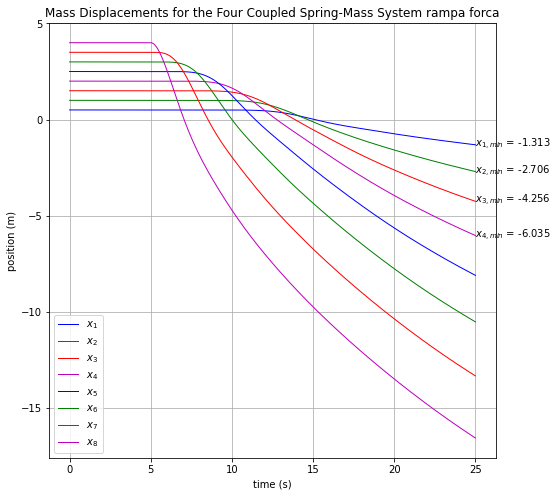

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(at, ax1, 'b', linewidth=1)
plt.plot(at, ax2, 'g', linewidth=1)
plt.plot(at, ax3, 'r', linewidth=1)
plt.plot(at, ax4, 'm', linewidth=1)
plt.plot(at, ax5, 'b', linewidth=1)
plt.plot(at, ax6, 'g', linewidth=1)
plt.plot(at, ax7, 'r', linewidth=1)
plt.plot(at, ax8, 'm', linewidth=1)

plt.text(at[ax1.index(min(ax1))], min(ax1)-0.1, '$x_{1,min}$ = '+str("{:.3f}".format(min(ax1))))
plt.text(at[ax2.index(min(ax2))], min(ax2)-0.1, '$x_{2,min}$ = '+str("{:.3f}".format(min(ax2))))
plt.text(at[ax3.index(min(ax3))], min(ax3)-0.1, '$x_{3,min}$ = '+str("{:.3f}".format(min(ax3))))
plt.text(at[ax4.index(min(ax4))], min(ax4)-0.1, '$x_{4,min}$ = '+str("{:.3f}".format(min(ax4))))
plt.grid(visible=True)
plt.xlabel('time (s)')
plt.ylabel('position (m)')
plt.legend((r'$x_1$', r'$x_2$', r'$x_3$', r'$x_4$',r'$x_5$', r'$x_6$', r'$x_7$', r'$x_8$',
            r'$x_9$', r'$x_{10}$', r'$x_{11}$', r'$x_{12}$',r'$x_{13}$', r'$x_{14}$', r'$x_{15}$', r'$x_{16}$',))
plt.title('Mass Displacements for the Four Coupled Spring-Mass System rampa forca')

#### Velocidades

Text(0.5, 1.0, 'Mass Velocities for the Four Coupled Spring-Mass System rampa forca')

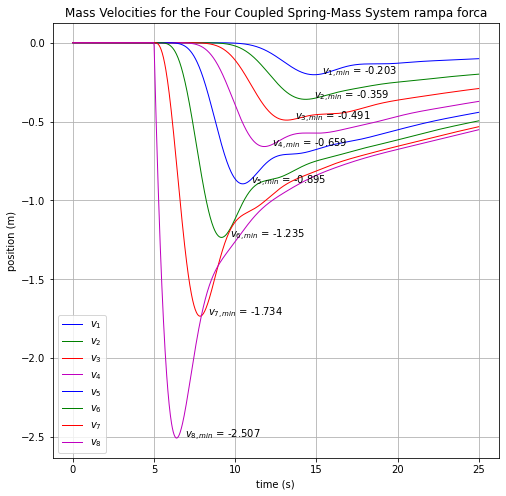

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(at, ay1, 'b', linewidth=1)
plt.plot(at, ay2, 'g', linewidth=1)
plt.plot(at, ay3, 'r', linewidth=1)
plt.plot(at, ay4, 'm', linewidth=1)
plt.plot(at, ay5, 'b', linewidth=1)
plt.plot(at, ay6, 'g', linewidth=1)
plt.plot(at, ay7, 'r', linewidth=1)
plt.plot(at, ay8, 'm', linewidth=1)

plt.text(at[ay1.index(min(ay1))]+0.5, min(ay1), '$v_{1,min}$ = '+str("{:.3f}".format(min(ay1))))
plt.text(at[ay2.index(min(ay2))]+0.5, min(ay2), '$v_{2,min}$ = '+str("{:.3f}".format(min(ay2))))
plt.text(at[ay3.index(min(ay3))]+0.5, min(ay3), '$v_{3,min}$ = '+str("{:.3f}".format(min(ay3))))
plt.text(at[ay4.index(min(ay4))]+0.5, min(ay4), '$v_{4,min}$ = '+str("{:.3f}".format(min(ay4))))
plt.text(at[ay5.index(min(ay5))]+0.5, min(ay5), '$v_{5,min}$ = '+str("{:.3f}".format(min(ay5))))
plt.text(at[ay6.index(min(ay6))]+0.5, min(ay6), '$v_{6,min}$ = '+str("{:.3f}".format(min(ay6))))
plt.text(at[ay7.index(min(ay7))]+0.5, min(ay7), '$v_{7,min}$ = '+str("{:.3f}".format(min(ay7))))
plt.text(at[ay8.index(min(ay8))]+0.5, min(ay8), '$v_{8,min}$ = '+str("{:.3f}".format(min(ay8))))

plt.grid(visible=True)
plt.xlabel('time (s)')
plt.ylabel('position (m)')
plt.legend((r'$v_1$', r'$v_2$', r'$v_3$', r'$v_4$',r'$v_5$', r'$v_6$', r'$v_7$', r'$v_8$'))
plt.title('Mass Velocities for the Four Coupled Spring-Mass System rampa forca')

Text(0.5, 1.0, 'Energies')

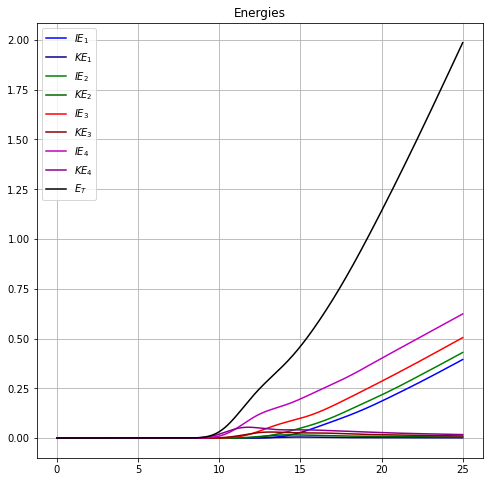

In [ ]:

# adendo
plt.figure(figsize=(8,8))
plt.grid(visible=True)
plt.plot(at,IE1,'b-')
plt.plot(at,KE1,'darkblue')
plt.plot(at,IE2,'g-')
plt.plot(at,KE2,'darkgreen')
plt.plot(at,IE3,'r-')
plt.plot(at,KE3,'darkred')
plt.plot(at,IE4,'m-')
plt.plot(at,KE4,'darkmagenta')
plt.plot(at,ET,'black')
plt.legend((r'$IE_1$',r'$KE_1$',r'$IE_2$',r'$KE_2$',r'$IE_3$',r'$KE_3$',r'$IE_4$',r'$KE_4$',r'$E_T$'))
plt.title('Energies')

#### Extremos

In [ ]:
print('x1_min = '+str(min(ax1)))
print('x2_min = '+str(min(ax2)))
print('x3_min = '+str(min(ax3)))

print('Freacao_max = '+str(max(-k*np.array(ax1) + np.array([k*L for i in range(len(ax1))]))))
print('Fx2_min = '+str(min(np.array([ degrau_forca(t) for t in at ]))))

In [ ]:
print(np.array([
    # nolds.lyap_r(a)#x1),
    nolds.lyap_e(ax1),#,emb_dim=28,matrix_dim=10),
    # nolds.dfa(ax1))#,
    # nolds.lyap_r(a)#x2),
    nolds.lyap_e(ax2),#,emb_dim=28,matrix_dim=10),
    # nolds.dfa(ax2))#,
    nolds.lyap_e(ax3),#,emb_dim=28,matrix_dim=10),
    
    nolds.lyap_e(ax4),#,emb_dim=28,matrix_dim=10),
    nolds.lyap_e(ax5),#,emb_dim=28,matrix_dim=10),
    nolds.lyap_e(ax6),#,emb_dim=28,matrix_dim=10),
    nolds.lyap_e(ax7),#,emb_dim=28,matrix_dim=10),
    nolds.lyap_e(ax8),#,emb_dim=28,matrix_dim=10),
]))


## Entrada de Rampa em Força em $x_3$

### Entradas

#### Rampa de Força de Entrada

In [ ]:
# rampa de forca
def rampa_forca(t):
    if t < tempo_inicial:
        forc = forca_inicial
    elif t >= tempo_inicial and t <= tempo_final:
        # forc = 5.0-1.0*t
        forc = forca_inicial+(forca_final-forca_inicial)/(10.0-5.0)*(t-5.0)
    else:
        forc = forca_final
    return forc

#### Campo Vetorial

In [ ]:
def rampa_forca_vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2,x3,y3]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,m3,k1,k2,k3,L1,L2,L3,b1,b2,b3]
    """
    x1, y1, x2, y2, x3, y3, x4, y4, x5, y5, x6, y6, x7, y7, x8, y8 = w
    m, k, L, b = p

    # Create f = (x1',y1',x2',y2' ...):
    f = [
            y1,
            (-b * y1 - k * (x1 - L) + k * (x2 - x1 - L) ) / m,
            y2,
            (-b * y2 - k * (x2 - x1 - L) + k * (x3 - x2 - L) ) / m,
            y3,
            (-b * y3 - k * (x3 - x2 - L) + k * (x4 - x3 - L) ) / m,
            y4,
            (-b * y4 - k * (x4 - x3 - L) + k * (x5 - x4 - L) ) / m,
            y5,
            (-b * y5 - k * (x5 - x4 - L) + k * (x6 - x5 - L) ) / m,
            y6,
            (-b * y6 - k * (x6 - x5 - L) + k * (x7 - x6 - L) ) / m,
            y7,
            (-b * y7 - k * (x7 - x6 - L) + k * (x8 - x7 - L) ) / m,
            y8,
            (-b * y8 - k * (x8 - x7 - L) + rampa_forca(t)) / m,
         ]
    return f

### Saídas

#### Unpacking

In [ ]:
p = [m, k, L, b]
w0 = [x1, y1, x2, y2, x3, y3, x4, y4, x5, y5, x6, y6, x7, y7, x8, y8]

# Call the ODE solver.
wsol = odeint(rampa_forca_vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

at, ax1, ay1, ax2, ay2, ax3, ay3, ax4, ay4  = [],[],[],[],[],[],[],[],[],
ax5, ay5, ax6, ay6, ax7, ay7, ax8, ay8  = [],[],[],[],[],[],[],[],
# adendo
IE1, KE1 = [],[]
IE2, KE2 = [],[]
IE3, KE3 = [],[]
IE4, KE4 = [],[]
IE5, KE5 = [],[]
IE6, KE6 = [],[]
IE7, KE7 = [],[]
IE8, KE8 = [],[]
ET = []
for t1, w1 in zip(t, wsol):
    # print( t1, w1[0], w1[1], w1[2], w1[3])
    at.append(t1)
    ax1.append(w1[0])
    ay1.append(w1[1])
    ax2.append(w1[2])
    ay2.append(w1[3])
    ax3.append(w1[4])
    ay3.append(w1[5])
    ax4.append(w1[6])
    ay4.append(w1[7])
    ax5.append(w1[8])
    ay5.append(w1[9])
    ax6.append(w1[10])
    ay6.append(w1[11])
    ax7.append(w1[12])
    ay7.append(w1[13])
    ax8.append(w1[14])
    ay8.append(w1[15])

    IE1.append(k*(w1[0]-L)**2/2)
    KE1.append(m*w1[1]**2/2)
    IE2.append(k*(w1[2]-w1[0]-L)**2/2)
    KE2.append(m*w1[3]**2/2)
    IE3.append(k*(w1[4]-w1[2]-L)**2/2)
    KE3.append(m*w1[5]**2/2)
    IE4.append(k*(w1[6]-w1[4]-L)**2/2)
    KE4.append(m*w1[7]**2/2)
    ET.append(k*(w1[0]-L)**2/2+
              m*w1[1]**2/2+
              k*(w1[2]-w1[0]-L)**2/2+
              m*w1[3]**2/2+
              k*(w1[4]-w1[2]-L)**2/2+
              m*w1[5]**2/2+
              k*(w1[6]-w1[4]-L)**2/2+
              m*w1[7]**2/2)

#### Forças Aplicadas e de Reação

In [ ]:
plt.figure(figsize=(8,8))
F1 = -k*np.array(ax1) + np.array([k*L for i in range(len(ax1))])
plt.plot(at, F1, 'b', linewidth=1)
F2 = -k*(np.array(ax2)-np.array(ax1)-L)
plt.plot(at, F2, 'g', linewidth=1)
F3 = -k*(np.array(ax3)-np.array(ax2)-L)
plt.plot(at, F3, 'c', linewidth=1)
F4 = -k*(np.array(ax4)-np.array(ax3)-L)
plt.plot(at, F4, 'm', linewidth=1)
F5 = -k*(np.array(ax5)-np.array(ax4)-L)
plt.plot(at, F5, 'b', linewidth=1)
F6 = -k*(np.array(ax6)-np.array(ax5)-L)
plt.plot(at, F6, 'g', linewidth=1)
F7 = -k*(np.array(ax7)-np.array(ax6)-L)
plt.plot(at, F7, 'c', linewidth=1)
F8 = -k*(np.array(ax8)-np.array(ax7)-L)
plt.plot(at, F8, 'm', linewidth=1)
plt.plot(at, -np.array([ rampa_forca(t) for t in at ]), 'r', linewidth=1)

plt.text(
    at[np.where(F1 == max(F1))[0][0]]+0.5,
    max(F1),
    '$F_{1,max}$ = '+str("{:.3f}".format(max(F1)))
    )
array_diferencas = F1 - (-forca_final)
indice_tr = np.abs(array_diferencas)[:np.where(F1 == max(F1))[0][0]].argmin()
plt.text(
    at[indice_tr]+0.25,
    -forca_final-0.05,
    '$t_{r,subida}$ = '+str("{:.3f}".format(at[indice_tr]))
    )
array_diferencas = F1 - (-forca_final/2)
indice_td = np.abs(array_diferencas)[:np.where(F1 == max(F1))[0][0]].argmin()
plt.text(
    at[indice_td]+0.25,
    - forca_final/2,
    '$t_{d,atraso}$ = '+str("{:.3f}".format(at[indice_td]))
    )
indice_tp = np.where(F1 == max(F1))[0][0]
plt.text(
    at[indice_tp]+2,
    F1[indice_tp]-0.05,
    '$t_{p,pico}$ = '+str("{:.3f}".format(at[indice_tp]))
    )
tolerancia = 0.02
array_diferencas_abs = np.abs( F1 - (-forca_final) )
indices_tol = np.where(array_diferencas_abs < tolerancia)[0]
comecos_de_pedacos = []
for i in range(len(indices_tol)-1):
  if indices_tol[i] != indices_tol[i+1]-1:
    comecos_de_pedacos.append(i)
indice_ts = indices_tol[comecos_de_pedacos[-1]+1]
plt.text(
    at[indice_ts],
    F1[indice_ts]-0.05,
    '$t_{s,assentamento}$ = '+str("{:.3f}".format(at[indice_ts]))
    )
omega_d = np.pi/at[indice_tp]
plt.text(
    0.0, 1.0,
    '$\omega_d$ = '+str("{:.3f}".format(omega_d))
)
UP = max(F1) - (-forca_final)
xi = -np.log(UP)/np.sqrt(np.pi**2+np.log(UP)**2)
plt.text(
    0.0, 0.9,
    r'$\xi$ = '+str("{:.3f}".format(xi))
)
omega_n = omega_d/np.sqrt(1-xi*xi)
plt.text(
    0.0, 0.8,
    '$\omega_n$ = '+str("{:.3f}".format(omega_n))
)
zeta = np.sqrt(1-xi**2)
plt.text(
    0.0, 0.7,
    '$\zeta$ = '+str("{:.3f}".format(zeta))
)
theta = np.arctan(np.sqrt(1-xi**2)/xi)
plt.text(
    0.0, 0.6,
    r'$\theta$ = '+str("{:.3f}".format(theta))
)
plt.grid(visible=True)
plt.xlabel('time (s)')
plt.ylabel('force (N)')
plt.legend((r'$F_{1}$', r'$F_{2}$', r'$F_{3}$', r'$F_{4}$',
            r'$F_{5}$', r'$F_{6}$', r'$F_{7}$', r'$F_{8}$',),loc='lower right')
plt.title('Reaction and Applied Forces for the Triply Coupled Spring-Mass System rampa forca')

#### Posições

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(at, ax1, 'b', linewidth=1)
plt.plot(at, ax2, 'g', linewidth=1)
plt.plot(at, ax3, 'r', linewidth=1)
plt.plot(at, ax4, 'm', linewidth=1)
plt.plot(at, ax5, 'b', linewidth=1)
plt.plot(at, ax6, 'g', linewidth=1)
plt.plot(at, ax7, 'r', linewidth=1)
plt.plot(at, ax8, 'm', linewidth=1)

plt.text(at[ax1.index(min(ax1))], min(ax1)-0.1, '$x_{1,min}$ = '+str("{:.3f}".format(min(ax1))))
plt.text(at[ax2.index(min(ax2))], min(ax2)-0.1, '$x_{2,min}$ = '+str("{:.3f}".format(min(ax2))))
plt.text(at[ax3.index(min(ax3))], min(ax3)-0.1, '$x_{3,min}$ = '+str("{:.3f}".format(min(ax3))))
plt.text(at[ax4.index(min(ax4))], min(ax4)-0.1, '$x_{4,min}$ = '+str("{:.3f}".format(min(ax4))))
plt.grid(visible=True)
plt.xlabel('time (s)')
plt.ylabel('position (m)')
plt.legend((r'$x_1$', r'$x_2$', r'$x_3$', r'$x_4$',r'$x_5$', r'$x_6$', r'$x_7$', r'$x_8$',
            r'$x_9$', r'$x_{10}$', r'$x_{11}$', r'$x_{12}$',r'$x_{13}$', r'$x_{14}$', r'$x_{15}$', r'$x_{16}$',))
plt.title('Mass Displacements for the Four Coupled Spring-Mass System rampa forca')

#### Velocidades

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(at, ay1, 'b', linewidth=1)
plt.plot(at, ay2, 'g', linewidth=1)
plt.plot(at, ay3, 'r', linewidth=1)
plt.plot(at, ay4, 'm', linewidth=1)
plt.plot(at, ay5, 'b', linewidth=1)
plt.plot(at, ay6, 'g', linewidth=1)
plt.plot(at, ay7, 'r', linewidth=1)
plt.plot(at, ay8, 'm', linewidth=1)

plt.text(at[ay1.index(min(ay1))]+0.5, min(ay1), '$v_{1,min}$ = '+str("{:.3f}".format(min(ay1))))
plt.text(at[ay2.index(min(ay2))]+0.5, min(ay2), '$v_{2,min}$ = '+str("{:.3f}".format(min(ay2))))
plt.text(at[ay3.index(min(ay3))]+0.5, min(ay3), '$v_{3,min}$ = '+str("{:.3f}".format(min(ay3))))
plt.text(at[ay4.index(min(ay4))]+0.5, min(ay4), '$v_{4,min}$ = '+str("{:.3f}".format(min(ay4))))
plt.text(at[ay5.index(min(ay5))]+0.5, min(ay5), '$v_{5,min}$ = '+str("{:.3f}".format(min(ay5))))
plt.text(at[ay6.index(min(ay6))]+0.5, min(ay6), '$v_{6,min}$ = '+str("{:.3f}".format(min(ay6))))
plt.text(at[ay7.index(min(ay7))]+0.5, min(ay7), '$v_{7,min}$ = '+str("{:.3f}".format(min(ay7))))
plt.text(at[ay8.index(min(ay8))]+0.5, min(ay8), '$v_{8,min}$ = '+str("{:.3f}".format(min(ay8))))

plt.grid(visible=True)
plt.xlabel('time (s)')
plt.ylabel('position (m)')
plt.legend((r'$v_1$', r'$v_2$', r'$v_3$', r'$v_4$',r'$v_5$', r'$v_6$', r'$v_7$', r'$v_8$'))
plt.title('Mass Velocities for the Four Coupled Spring-Mass System rampa forca')

In [ ]:

# adendo
plt.figure(figsize=(8,8))
plt.grid(visible=True)
plt.plot(at,IE1,'b-')
plt.plot(at,KE1,'darkblue')
plt.plot(at,IE2,'g-')
plt.plot(at,KE2,'darkgreen')
plt.plot(at,IE3,'r-')
plt.plot(at,KE3,'darkred')
plt.plot(at,IE4,'m-')
plt.plot(at,KE4,'darkmagenta')
plt.plot(at,ET,'black')
plt.legend((r'$IE_1$',r'$KE_1$',r'$IE_2$',r'$KE_2$',r'$IE_3$',r'$KE_3$',r'$IE_4$',r'$KE_4$',r'$E_T$'))
plt.title('Energies')

#### Extremos

In [ ]:
print('x1_min = '+str(min(ax1)))
print('x2_min = '+str(min(ax2)))
print('x3_min = '+str(min(ax3)))

print('Freacao_max = '+str(max(-k*np.array(ax1) + np.array([k*L for i in range(len(ax1))]))))
print('Fx2_min = '+str(min(np.array([ rampa_forca(t) for t in at ]))))

In [ ]:
print(np.array([
    # nolds.lyap_r(a)#x1),
    nolds.lyap_e(ax1),#,emb_dim=28,matrix_dim=10),
    # nolds.dfa(ax1))#,
    # nolds.lyap_r(a)#x2),
    nolds.lyap_e(ax2),#,emb_dim=28,matrix_dim=10),
    # nolds.dfa(ax2))#,
    nolds.lyap_e(ax3),#,emb_dim=28,matrix_dim=10),
    
    nolds.lyap_e(ax4),#,emb_dim=28,matrix_dim=10),
    nolds.lyap_e(ax5),#,emb_dim=28,matrix_dim=10),
    nolds.lyap_e(ax6),#,emb_dim=28,matrix_dim=10),
    nolds.lyap_e(ax7),#,emb_dim=28,matrix_dim=10),
    nolds.lyap_e(ax8),#,emb_dim=28,matrix_dim=10),
]))

## Entrada de Rampa em Deslocamento em $x_3$

### Entradas

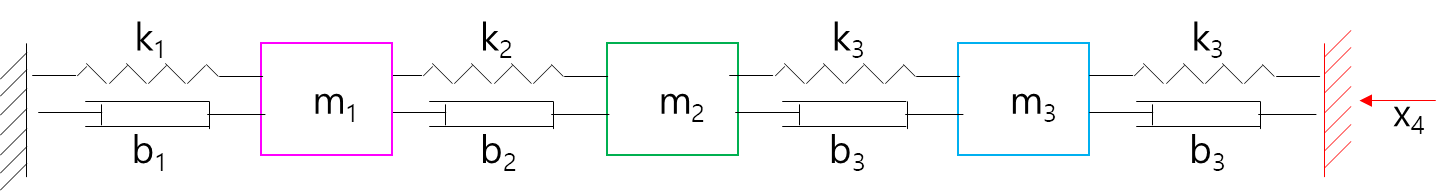

#### Rampa em Degrau de Entrada

In [ ]:
# rampa de deslocamento
# def rampa_disp(t):
#     if t < 5.0:
#         desl = L1 + L2 + L3
#     elif t >=5.0 and t <= 10.0:
#         desl = 3.0 - 0.2*t
#     else:
#         desl = (L1+L2+L3)
#     return desl

In [ ]:
def rampa_disp(t):
    return rampa_forca(t)*(1/k1+1/k2+1/k3+1/k4)+(L1+L2+L3+L4)

Criando uma derivada da função rampa definida de forma simbólica.

In [ ]:
from sympy import Piecewise
from sympy import symbols

In [ ]:
tempo = symbols('t')
rampa_desl = Piecewise(
    (forca_inicial, (tempo > 0.0) & (tempo < 5.0)),
    (forca_inicial+(forca_final-forca_inicial)/(10.0-5.0)*(tempo-5.0), (tempo >= 5.0) & (tempo < 10.0)),
    (forca_final*(1/k+1/k+1/k+1/k)+(L+L+L+L), (tempo >= 10.0))
)
rampa_desl_derivada = rampa_desl.diff(tempo)
rampa_desl.diff(tempo)

In [ ]:
def rampa_desl_vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2]
    """
    x1, y1, x2, y2, x3, y3 = w
    m1, m2, m3, k1, k2, k3, k4, L1, L2, L3, L4, b1, b2, b3, b4 = p

    # Create f = (x1',y1',x2',y2'):
    f = [
            y1,
            (-b1 * y1 - k1 * (x1 - L1) + k2 * (x2 - x1 - L2) ) / m1,
            y2,
            (-b2 * y2 - k2 * (x2 - x1 - L2) + k3 * (x3 -x2 - L3) ) / m2,
            y3,
            (-b3 * y3 - k3 * (x3 - x2 - L3) + k4 * (rampa_disp(t) - x3 - L4) ) / m3,
        ]
    return f

### Saídas

#### Unpacking

In [ ]:
p = [m, k, L, b]
w0 = [x1, y1, x2, y2, x3, y3, x4, y4, x5, y5, x6, y6, x7, y7, x8, y8]

# Call the ODE solver.
wsol = odeint(degrau_forca_vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

at, ax1, ay1, ax2, ay2, ax3, ay3, ax4, ay4  = [],[],[],[],[],[],[],[],[],
ax5, ay5, ax6, ay6, ax7, ay7, ax8, ay8  = [],[],[],[],[],[],[],[],
# adendo
IE1, KE1 = [],[]
IE2, KE2 = [],[]
IE3, KE3 = [],[]
IE4, KE4 = [],[]
IE5, KE5 = [],[]
IE6, KE6 = [],[]
IE7, KE7 = [],[]
IE8, KE8 = [],[]
ET = []
for t1, w1 in zip(t, wsol):
    # print( t1, w1[0], w1[1], w1[2], w1[3])
    at.append(t1)
    ax1.append(w1[0])
    ay1.append(w1[1])
    ax2.append(w1[2])
    ay2.append(w1[3])
    ax3.append(w1[4])
    ay3.append(w1[5])
    ax4.append(w1[6])
    ay4.append(w1[7])
    ax5.append(w1[8])
    ay5.append(w1[9])
    ax6.append(w1[10])
    ay6.append(w1[11])
    ax7.append(w1[12])
    ay7.append(w1[13])
    ax8.append(w1[14])
    ay8.append(w1[15])

    IE1.append(k*(w1[0]-L)**2/2)
    KE1.append(m*w1[1]**2/2)
    IE2.append(k*(w1[2]-w1[0]-L)**2/2)
    KE2.append(m*w1[3]**2/2)
    IE3.append(k*(w1[4]-w1[2]-L)**2/2)
    KE3.append(m*w1[5]**2/2)
    IE4.append(k*(w1[6]-w1[4]-L)**2/2)
    KE4.append(m*w1[7]**2/2)
    ET.append(k*(w1[0]-L)**2/2+
              m*w1[1]**2/2+
              k*(w1[2]-w1[0]-L)**2/2+
              m*w1[3]**2/2+
              k*(w1[4]-w1[2]-L)**2/2+
              m*w1[5]**2/2+
              k*(w1[6]-w1[4]-L)**2/2+
              m*w1[7]**2/2)

#### Forças de Reação

In [ ]:
plt.figure(figsize=(8,8))
F1 = -k*np.array(ax1) + np.array([k*L for i in range(len(ax1))])
plt.plot(at, F1, 'b', linewidth=1)
F2 = -k*(np.array(ax2)-np.array(ax1)-L)
plt.plot(at, F2, 'g', linewidth=1)
F3 = -k*(np.array(ax3)-np.array(ax2)-L)
plt.plot(at, F3, 'c', linewidth=1)
F4 = -k*(np.array(ax4)-np.array(ax3)-L)
plt.plot(at, F4, 'm', linewidth=1)
F5 = -k*(np.array(ax5)-np.array(ax4)-L)
plt.plot(at, F5, 'b', linewidth=1)
F6 = -k*(np.array(ax6)-np.array(ax5)-L)
plt.plot(at, F6, 'g', linewidth=1)
F7 = -k*(np.array(ax7)-np.array(ax6)-L)
plt.plot(at, F7, 'c', linewidth=1)
F8 = -k*(np.array(ax8)-np.array(ax7)-L)
plt.plot(at, F8, 'm', linewidth=1)
plt.plot(at, -np.array([ rampa_forca(t) for t in at ]), 'r', linewidth=1)

plt.text(
    at[np.where(F1 == max(F1))[0][0]]+0.5,
    max(F1),
    '$F_{1,max}$ = '+str("{:.3f}".format(max(F1)))
    )
array_diferencas = F1 - (-forca_final)
indice_tr = np.abs(array_diferencas)[:np.where(F1 == max(F1))[0][0]].argmin()
plt.text(
    at[indice_tr]+0.25,
    -forca_final-0.05,
    '$t_{r,subida}$ = '+str("{:.3f}".format(at[indice_tr]))
    )
array_diferencas = F1 - (-forca_final/2)
indice_td = np.abs(array_diferencas)[:np.where(F1 == max(F1))[0][0]].argmin()
plt.text(
    at[indice_td]+0.25,
    - forca_final/2,
    '$t_{d,atraso}$ = '+str("{:.3f}".format(at[indice_td]))
    )
indice_tp = np.where(F1 == max(F1))[0][0]
plt.text(
    at[indice_tp]+2,
    F1[indice_tp]-0.05,
    '$t_{p,pico}$ = '+str("{:.3f}".format(at[indice_tp]))
    )
tolerancia = 0.02
array_diferencas_abs = np.abs( F1 - (-forca_final) )
indices_tol = np.where(array_diferencas_abs < tolerancia)[0]
comecos_de_pedacos = []
for i in range(len(indices_tol)-1):
  if indices_tol[i] != indices_tol[i+1]-1:
    comecos_de_pedacos.append(i)
indice_ts = indices_tol[comecos_de_pedacos[-1]+1]
plt.text(
    at[indice_ts],
    F1[indice_ts]-0.05,
    '$t_{s,assentamento}$ = '+str("{:.3f}".format(at[indice_ts]))
    )
omega_d = np.pi/at[indice_tp]
plt.text(
    0.0, 1.0,
    '$\omega_d$ = '+str("{:.3f}".format(omega_d))
)
UP = max(F1) - (-forca_final)
xi = -np.log(UP)/np.sqrt(np.pi**2+np.log(UP)**2)
plt.text(
    0.0, 0.9,
    r'$\xi$ = '+str("{:.3f}".format(xi))
)
omega_n = omega_d/np.sqrt(1-xi*xi)
plt.text(
    0.0, 0.8,
    '$\omega_n$ = '+str("{:.3f}".format(omega_n))
)
zeta = np.sqrt(1-xi**2)
plt.text(
    0.0, 0.7,
    '$\zeta$ = '+str("{:.3f}".format(zeta))
)
theta = np.arctan(np.sqrt(1-xi**2)/xi)
plt.text(
    0.0, 0.6,
    r'$\theta$ = '+str("{:.3f}".format(theta))
)
plt.grid(visible=True)
plt.xlabel('time (s)')
plt.ylabel('force (N)')
plt.legend((r'$F_{1}$', r'$F_{2}$', r'$F_{3}$', r'$F_{4}$',
            r'$F_{5}$', r'$F_{6}$', r'$F_{7}$', r'$F_{8}$',),loc='lower right')
plt.title('Reaction and Applied Forces for the Triply Coupled Spring-Mass System rampa forca')

In [ ]:
plt.figure(figsize=(8,8))
Freacao = -k1*np.array(ax1) + np.array([k1*L1 for i in range(len(ax1))])
plt.plot(at, Freacao, 'b', linewidth=1)
F2 = -k2*(np.array(ax2)-np.array(ax1)-L2)
plt.plot(at, F2, 'g', linewidth=1)
F3 = -k3*(np.array(ax3)-np.array(ax2)-L3)
plt.plot(at, F3, 'c', linewidth=1)
F4 = -k4*(np.array(ax4)-np.array(ax3)-L4)
plt.plot(at, F4, 'm', linewidth=1)

plt.text(
    at[np.where(Freacao == max(Freacao))[0][0]]+0.5,
    max(Freacao),
    '$F_{reacao,max}$ = '+str("{:.3f}".format(max(Freacao)))
    )
array_diferencas = Freacao - (-forca_final)
indice_tr = np.abs(array_diferencas)[:np.where(Freacao == max(Freacao))[0][0]].argmin()
plt.text(
    at[indice_tr]+0.25,
    -forca_final-0.05,
    '$t_{r,subida}$ = '+str("{:.3f}".format(at[indice_tr]))
    )
array_diferencas = Freacao - (-forca_final/2)
indice_td = np.abs(array_diferencas)[:np.where(Freacao == max(Freacao))[0][0]].argmin()
plt.text(
    at[indice_td]+0.25,
    - forca_final/2,
    '$t_{d,atraso}$ = '+str("{:.3f}".format(at[indice_td]))
    )
indice_tp = np.where(Freacao == max(Freacao))[0][0]
plt.text(
    at[indice_tp]+2,
    Freacao[indice_tp]-0.05,
    '$t_{p,pico}$ = '+str("{:.3f}".format(at[indice_tp]))
    )
tolerancia = 0.02
array_diferencas_abs = np.abs( Freacao - (-forca_final) )
indices_tol = np.where(array_diferencas_abs < tolerancia)[0]
comecos_de_pedacos = []
for i in range(len(indices_tol)-1):
  if indices_tol[i] != indices_tol[i+1]-1:
    comecos_de_pedacos.append(i)
indice_ts = indices_tol[comecos_de_pedacos[-1]+1]
plt.text(
    at[indice_ts],
    Freacao[indice_ts]-0.05,
    '$t_{s,assentamento}$ = '+str("{:.3f}".format(at[indice_ts]))
    )
omega_d = np.pi/at[indice_tp]
plt.text(
    0.0, 1.0,
    '$\omega_d$ = '+str("{:.3f}".format(omega_d))
)
UP = max(Freacao) - (-forca_final)
xi = -np.log(UP)/np.sqrt(np.pi**2+np.log(UP)**2)
plt.text(
    0.0, 0.9,
    r'$\xi$ = '+str("{:.3f}".format(xi))
)
omega_n = omega_d/np.sqrt(1-xi*xi)
plt.text(
    0.0, 0.8,
    '$\omega_n$ = '+str("{:.3f}".format(omega_n))
)
zeta = np.sqrt(1-xi**2)
plt.text(
    0.0, 0.7,
    '$\zeta$ = '+str("{:.3f}".format(zeta))
)
theta = np.arctan(np.sqrt(1-xi**2)/xi)
plt.text(
    0.0, 0.6,
    r'$\theta$ = '+str("{:.3f}".format(theta))
)
plt.grid(visible=True)
plt.xlabel('time (s)')
plt.ylabel('force (N)')
plt.legend((r'$F_{reacao}$', r'$F_{2}$', r'$F_{3}$', r'$F_{4}$', r'$F_{5}$'),loc='lower right')
plt.title('Reaction and Applied Forces for the Four Coupled Spring-Mass System rampa desl')

#### Posições

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(at, ax1, 'b', linewidth=1)
plt.plot(at, ax2, 'g', linewidth=1)
plt.plot(at, ax3, 'r', linewidth=1)
plt.plot(at, ax4, 'm', linewidth=1)

plt.text(at[ax1.index(min(ax1))], min(ax1)-0.1, '$x_{1,min}$ = '+str("{:.3f}".format(min(ax1))))
plt.text(at[ax2.index(min(ax2))], min(ax2)-0.1, '$x_{2,min}$ = '+str("{:.3f}".format(min(ax2))))
plt.text(at[ax3.index(min(ax3))], min(ax3)-0.1, '$x_{3,min}$ = '+str("{:.3f}".format(min(ax3))))
plt.text(at[ax4.index(min(ax4))], min(ax4)-0.1, '$x_{4,min}$ = '+str("{:.3f}".format(min(ax4))))
plt.grid(visible=True)
plt.xlabel('time (s)')
plt.ylabel('position (m)')
plt.legend((r'$x_1$', r'$x_2$', r'$x_3$', r'$x_4$'))
plt.title('Mass Displacements for the Four Coupled Spring-Mass System rampa desl')

#### Velocidades

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(at, ay1, 'b', linewidth=1)
plt.plot(at, ay2, 'g', linewidth=1)
plt.plot(at, ay3, 'r', linewidth=1)
plt.plot(at, ay4, 'm', linewidth=1)


plt.text(at[ay1.index(min(ay1))]+0.5, min(ay1), '$v_{1,min}$ = '+str("{:.3f}".format(min(ay1))))
plt.text(at[ay2.index(min(ay2))]+0.5, min(ay2), '$v_{2,min}$ = '+str("{:.3f}".format(min(ay2))))
plt.text(at[ay3.index(min(ay3))]+0.5, min(ay3), '$v_{3,min}$ = '+str("{:.3f}".format(min(ay3))))
# plt.text(at[ay4.index(min(ay4))]+0.5, min(ay4), '$v_{4,min}$ = '+str("{:.3f}".format(min(ay4))))

plt.grid(visible=True)
plt.xlabel('time (s)')
plt.ylabel('position (m)')
plt.legend((r'$v_1$', r'$v_2$', r'$v_3$', r'$v_4$', r'$v_5$'))
plt.title('Mass Velocities for the Four Coupled Spring-Mass System rampa desl')

In [ ]:

# adendo
plt.figure(figsize=(8,8))
plt.grid(visible=True)
plt.plot(at,IE1,'b-')
plt.plot(at,KE1,'darkblue')
plt.plot(at,IE2,'g-')
plt.plot(at,KE2,'darkgreen')
plt.plot(at,IE3,'r-')
plt.plot(at,KE3,'darkred')
plt.plot(at,IE4,'m-')
plt.plot(at,KE4,'darkmagenta')
plt.plot(at,ET,'black')
plt.legend((r'$IE_1$',r'$KE_1$',r'$IE_2$',r'$KE_2$',r'$IE_3$',r'$KE_3$',r'$IE_4$',r'$KE_4$',r'$E_T$'))
plt.title('Energies')

#### Extremos

In [ ]:
print('x1_min = '+str(min(ax1)))
print('x2_min = '+str(min(ax2)))
print('x3_min = '+str(min(ax3)))

print('Freacao_max = '+str(max(-k1*np.array(ax1) + np.array([k1*L1 for i in range(len(ax1))]))))
print('Fx2_min = '+str(min(np.array([ rampa_forca(t) for t in at ]))))

In [ ]:
print(np.array([
    # nolds.lyap_r(a)#x1),
    nolds.lyap_e(ax1),#,emb_dim=28,matrix_dim=10),
    # nolds.dfa(ax1))#,
    # nolds.lyap_r(a)#x2),
    nolds.lyap_e(ax2),#,emb_dim=28,matrix_dim=10),
    # nolds.dfa(ax2))#,
    nolds.lyap_e(ax3),#,emb_dim=28,matrix_dim=10),
    
    nolds.lyap_e(ax4),#,emb_dim=28,matrix_dim=10),
]))

Can I calculate the Kaplan-Yorke dimension?

In [ ]:
#nolds.lyap_e(ax1,emb_dim=19*4+1,matrix_dim=20)

In [ ]:
19*4+1